In [26]:
#加载数据
def load_data(file_name, split):
    df = pd.read_excel(file_name)
    data_all = np.array(df).astype(float)
    np.random.shuffle(data_all)
    x = data_all[:, 0:1]
    y = data_all[:, 1:2]
    split_boundary = int(data_all.shape[0] * split)
    train_x = x[: split_boundary]
    test_x = x[split_boundary:]
    train_y = y[: split_boundary]
    test_y = y[split_boundary:]
    return train_x, train_y, test_x, test_y

加载数据集，分割为训练集和验证集

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras import models
from keras import layers
import warnings
warnings.filterwarnings("ignore")
import time

In [28]:
(train_data, train_targets,test_data, test_targets)=load_data("tempture.xls",0.8)

In [29]:
#新建模型
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [30]:
#训练模型
def train_model(train_x, train_y, test_x, test_y):
    model = build_model()
    history = model.fit(train_x, train_y,
                        validation_data=(test_x, test_y),
                        epochs=500, batch_size=1, verbose=1)
    mae_history = history.history['val_mean_absolute_error']
    model.save("nihe.h5")
    return history

def plot_save_history(history):
    try:
        model_id = np.int64(time.strftime('%Y%m%d%H%M', time.localtime(time.time())))
        fig = plt.figure()#新建一张图
        mae=history.history['val_mean_absolute_error']
        plt.plot(range(1,len(mae)+1),mae,'r',label='training mae')
        plt.title('Loss and Acc on Training Data')
        plt.ylabel('acc-loss')
        plt.xlabel('epoch')
        plt.legend(loc='upper right')
        plt.show()
    except IOError:
        print ("Error: 打印结果失败")
        return 0
    else:
        return 1

Train on 1475 samples, validate on 369 samples
Epoch 1/500
1475/1475 [==============================] - 2s 1ms/step - loss: 161.4843 - mean_absolute_error: 7.2170 - val_loss: 1.9767 - val_mean_absolute_error: 1.2130
Epoch 2/500
1475/1475 [==============================] - 1s 978us/step - loss: 0.7553 - mean_absolute_error: 0.6227 - val_loss: 0.1237 - val_mean_absolute_error: 0.3017
Epoch 3/500
1475/1475 [==============================] - 1s 974us/step - loss: 0.0742 - mean_absolute_error: 0.2108 - val_loss: 0.0319 - val_mean_absolute_error: 0.1385
Epoch 4/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0655 - mean_absolute_error: 0.1977 - val_loss: 0.0352 - val_mean_absolute_error: 0.1513
Epoch 5/500
1475/1475 [==============================] - 1s 995us/step - loss: 0.0621 - mean_absolute_error: 0.1937 - val_loss: 0.0610 - val_mean_absolute_error: 0.1766
Epoch 6/500
1475/1475 [==============================] - 1s 984us/step - loss: 0.0615 - mean_absolute_error: 0

1475/1475 [==============================] - 1s 981us/step - loss: 0.0536 - mean_absolute_error: 0.1797 - val_loss: 0.0373 - val_mean_absolute_error: 0.1586
Epoch 50/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0528 - mean_absolute_error: 0.1801 - val_loss: 0.0233 - val_mean_absolute_error: 0.1165
Epoch 51/500
1475/1475 [==============================] - 1s 979us/step - loss: 0.0536 - mean_absolute_error: 0.1835 - val_loss: 0.0269 - val_mean_absolute_error: 0.1237
Epoch 52/500
1475/1475 [==============================] - 1s 968us/step - loss: 0.0519 - mean_absolute_error: 0.1809 - val_loss: 0.0500 - val_mean_absolute_error: 0.1641
Epoch 53/500
1475/1475 [==============================] - 1s 993us/step - loss: 0.0544 - mean_absolute_error: 0.1822 - val_loss: 0.0503 - val_mean_absolute_error: 0.1813
Epoch 54/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0543 - mean_absolute_error: 0.1781 - val_loss: 0.0378 - val_mean_absolute_error: 0.15

Epoch 98/500
1475/1475 [==============================] - 1s 984us/step - loss: 0.0499 - mean_absolute_error: 0.1744 - val_loss: 0.1279 - val_mean_absolute_error: 0.2797
Epoch 99/500
1475/1475 [==============================] - 1s 982us/step - loss: 0.0486 - mean_absolute_error: 0.1737 - val_loss: 0.0804 - val_mean_absolute_error: 0.2357
Epoch 100/500
1475/1475 [==============================] - 1s 988us/step - loss: 0.0510 - mean_absolute_error: 0.1766 - val_loss: 0.1329 - val_mean_absolute_error: 0.3172
Epoch 101/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0499 - mean_absolute_error: 0.1748 - val_loss: 0.0790 - val_mean_absolute_error: 0.2273
Epoch 102/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0508 - mean_absolute_error: 0.1778 - val_loss: 0.0706 - val_mean_absolute_error: 0.2110
Epoch 103/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0498 - mean_absolute_error: 0.1752 - val_loss: 0.0700 - val_mean_absol

1475/1475 [==============================] - 2s 1ms/step - loss: 0.0474 - mean_absolute_error: 0.1723 - val_loss: 0.0282 - val_mean_absolute_error: 0.1258
Epoch 147/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0480 - mean_absolute_error: 0.1716 - val_loss: 0.0253 - val_mean_absolute_error: 0.1244
Epoch 148/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0488 - mean_absolute_error: 0.1730 - val_loss: 0.0463 - val_mean_absolute_error: 0.1759
Epoch 149/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0483 - mean_absolute_error: 0.1718 - val_loss: 0.0254 - val_mean_absolute_error: 0.1180
Epoch 150/500
1475/1475 [==============================] - 1s 978us/step - loss: 0.0480 - mean_absolute_error: 0.1729 - val_loss: 0.0492 - val_mean_absolute_error: 0.1762
Epoch 151/500
1475/1475 [==============================] - 1s 972us/step - loss: 0.0493 - mean_absolute_error: 0.1734 - val_loss: 0.0387 - val_mean_absolute_error: 0.1

1475/1475 [==============================] - 1s 1ms/step - loss: 0.0477 - mean_absolute_error: 0.1694 - val_loss: 0.0453 - val_mean_absolute_error: 0.1689
Epoch 195/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0479 - mean_absolute_error: 0.1687 - val_loss: 0.0483 - val_mean_absolute_error: 0.1793
Epoch 196/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0472 - mean_absolute_error: 0.1689 - val_loss: 0.0237 - val_mean_absolute_error: 0.1139
Epoch 197/500
1475/1475 [==============================] - ETA: 0s - loss: 0.0504 - mean_absolute_error: 0.175 - 1s 983us/step - loss: 0.0502 - mean_absolute_error: 0.1750 - val_loss: 0.0537 - val_mean_absolute_error: 0.1919
Epoch 198/500
1475/1475 [==============================] - 1s 975us/step - loss: 0.0473 - mean_absolute_error: 0.1709 - val_loss: 0.0274 - val_mean_absolute_error: 0.1230
Epoch 199/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0491 - mean_absolute_error: 0.

1475/1475 [==============================] - 1s 1ms/step - loss: 0.0458 - mean_absolute_error: 0.1655 - val_loss: 0.0283 - val_mean_absolute_error: 0.1226
Epoch 243/500
1475/1475 [==============================] - 1s 996us/step - loss: 0.0457 - mean_absolute_error: 0.1670 - val_loss: 0.0846 - val_mean_absolute_error: 0.2502
Epoch 244/500
1475/1475 [==============================] - 1s 987us/step - loss: 0.0473 - mean_absolute_error: 0.1689 - val_loss: 0.0339 - val_mean_absolute_error: 0.1339
Epoch 245/500
1475/1475 [==============================] - 1s 996us/step - loss: 0.0467 - mean_absolute_error: 0.1699 - val_loss: 0.0361 - val_mean_absolute_error: 0.1509
Epoch 246/500
1475/1475 [==============================] - 1s 995us/step - loss: 0.0462 - mean_absolute_error: 0.1682 - val_loss: 0.0444 - val_mean_absolute_error: 0.1671
Epoch 247/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0463 - mean_absolute_error: 0.1668 - val_loss: 0.0421 - val_mean_absolute_error:

1475/1475 [==============================] - ETA: 0s - loss: 0.0460 - mean_absolute_error: 0.167 - 1s 984us/step - loss: 0.0461 - mean_absolute_error: 0.1676 - val_loss: 0.0705 - val_mean_absolute_error: 0.2198
Epoch 291/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0440 - mean_absolute_error: 0.1657 - val_loss: 0.0261 - val_mean_absolute_error: 0.1240
Epoch 292/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0449 - mean_absolute_error: 0.1656 - val_loss: 0.0453 - val_mean_absolute_error: 0.1714
Epoch 293/500
1475/1475 [==============================] - 1s 991us/step - loss: 0.0453 - mean_absolute_error: 0.1691 - val_loss: 0.0920 - val_mean_absolute_error: 0.2692
Epoch 294/500
1475/1475 [==============================] - 1s 997us/step - loss: 0.0454 - mean_absolute_error: 0.1655 - val_loss: 0.0571 - val_mean_absolute_error: 0.1959
Epoch 295/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0439 - mean_absolute_error: 

1475/1475 [==============================] - 1s 990us/step - loss: 0.0443 - mean_absolute_error: 0.1651 - val_loss: 0.0237 - val_mean_absolute_error: 0.1142
Epoch 339/500
1475/1475 [==============================] - 1s 990us/step - loss: 0.0429 - mean_absolute_error: 0.1604 - val_loss: 0.0821 - val_mean_absolute_error: 0.2443
Epoch 340/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0447 - mean_absolute_error: 0.1637 - val_loss: 0.0303 - val_mean_absolute_error: 0.1310
Epoch 341/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0436 - mean_absolute_error: 0.1635 - val_loss: 0.0763 - val_mean_absolute_error: 0.2271
Epoch 342/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0435 - mean_absolute_error: 0.1617 - val_loss: 0.0242 - val_mean_absolute_error: 0.1177
Epoch 343/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0438 - mean_absolute_error: 0.1633 - val_loss: 0.0224 - val_mean_absolute_error: 0.1

1475/1475 [==============================] - 1s 993us/step - loss: 0.0427 - mean_absolute_error: 0.1599 - val_loss: 0.0225 - val_mean_absolute_error: 0.1106
Epoch 387/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0424 - mean_absolute_error: 0.1607 - val_loss: 0.0298 - val_mean_absolute_error: 0.1289
Epoch 388/500
1475/1475 [==============================] - 1s 996us/step - loss: 0.0454 - mean_absolute_error: 0.1662 - val_loss: 0.0785 - val_mean_absolute_error: 0.2250
Epoch 389/500
1475/1475 [==============================] - 1s 1ms/step - loss: 0.0431 - mean_absolute_error: 0.1617 - val_loss: 0.0589 - val_mean_absolute_error: 0.1919
Epoch 390/500
1475/1475 [==============================] - 1s 997us/step - loss: 0.0444 - mean_absolute_error: 0.1629 - val_loss: 0.0416 - val_mean_absolute_error: 0.1592
Epoch 391/500
1475/1475 [==============================] - 2s 1ms/step - loss: 0.0443 - mean_absolute_error: 0.1640 - val_loss: 0.0518 - val_mean_absolute_error: 0

Epoch 434/500
1475/1475 [==============================] - 1s 881us/step - loss: 0.0417 - mean_absolute_error: 0.1593 - val_loss: 0.0230 - val_mean_absolute_error: 0.1121
Epoch 435/500
1475/1475 [==============================] - 1s 909us/step - loss: 0.0424 - mean_absolute_error: 0.1605 - val_loss: 0.0385 - val_mean_absolute_error: 0.1577
Epoch 436/500
1475/1475 [==============================] - 1s 877us/step - loss: 0.0429 - mean_absolute_error: 0.1615 - val_loss: 0.0599 - val_mean_absolute_error: 0.2021
Epoch 437/500
1475/1475 [==============================] - 1s 905us/step - loss: 0.0416 - mean_absolute_error: 0.1593 - val_loss: 0.0390 - val_mean_absolute_error: 0.1612
Epoch 438/500
1475/1475 [==============================] - ETA: 0s - loss: 0.0423 - mean_absolute_error: 0.161 - 1s 915us/step - loss: 0.0422 - mean_absolute_error: 0.1614 - val_loss: 0.0658 - val_mean_absolute_error: 0.2165
Epoch 439/500
1475/1475 [==============================] - 1s 913us/step - loss: 0.0437 - m

1475/1475 [==============================] - 1s 871us/step - loss: 0.0422 - mean_absolute_error: 0.1595 - val_loss: 0.0257 - val_mean_absolute_error: 0.1184
Epoch 482/500
1475/1475 [==============================] - 1s 871us/step - loss: 0.0420 - mean_absolute_error: 0.1622 - val_loss: 0.0376 - val_mean_absolute_error: 0.1502
Epoch 483/500
1475/1475 [==============================] - 1s 871us/step - loss: 0.0419 - mean_absolute_error: 0.1604 - val_loss: 0.0436 - val_mean_absolute_error: 0.1587
Epoch 484/500
1475/1475 [==============================] - 1s 869us/step - loss: 0.0425 - mean_absolute_error: 0.1606 - val_loss: 0.0377 - val_mean_absolute_error: 0.1608
Epoch 485/500
1475/1475 [==============================] - 1s 881us/step - loss: 0.0414 - mean_absolute_error: 0.1604 - val_loss: 0.0513 - val_mean_absolute_error: 0.1888
Epoch 486/500
1475/1475 [==============================] - 1s 878us/step - loss: 0.0426 - mean_absolute_error: 0.1610 - val_loss: 0.0325 - val_mean_absolute_er

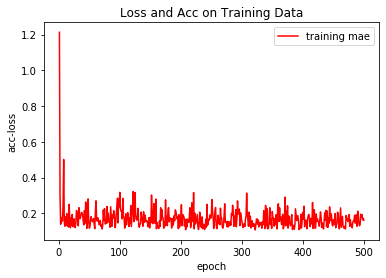

1

In [31]:
    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    train_data /= std
    test_data -= mean
    test_data /= std
    # #训练+显示
    history=train_model(train_data, train_targets,test_data, test_targets)
    plot_save_history(history)

In [34]:
from keras.models import load_model
def test_model(model_file_path,mean,std):
    try:
        model = load_model(model_file_path)
        df = pd.read_excel("test.xls",sheet_name="Sheet2",header=0)
        test_x1 = np.array(df).astype(float)
        print("test_x1=", test_x1)
        test_x1 -= mean
        test_x1 /= std
        predict = model.predict(test_x1)
        df_day=pd.DataFrame()
        print("shape=",predict.shape)
        predict_reshape=np.reshape(predict,(predict.shape[0],1))
        plt.plot(range(1,len(predict_reshape)+1),predict_reshape,'r',label='predict')
        plt.show()
        for index,item in enumerate(predict_reshape):
            add_data = pd.Series({'id': index,'value':item[0]})
            df_day = df_day.append(add_data, ignore_index=True)
        df_day.to_excel("result.xls")
        print("predict=",predict)
    except KeyboardInterrupt:
        print(predict)
    return predict

test_x1= [[-20.]
 [-19.]
 [-18.]
 [-17.]
 [-16.]
 [-15.]
 [-14.]
 [-13.]
 [-12.]
 [-11.]
 [-10.]
 [ -9.]
 [ -8.]
 [ -7.]
 [ -6.]
 [ -5.]
 [ -4.]
 [ -3.]
 [ -2.]
 [ -1.]
 [  0.]
 [  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]
 [ 11.]
 [ 12.]
 [ 13.]
 [ 14.]
 [ 15.]
 [ 16.]
 [ 17.]
 [ 18.]
 [ 19.]
 [ 20.]
 [ 21.]
 [ 22.]
 [ 23.]
 [ 24.]
 [ 25.]
 [ 26.]
 [ 27.]
 [ 28.]
 [ 29.]
 [ 30.]
 [ 31.]
 [ 32.]
 [ 33.]
 [ 34.]
 [ 35.]
 [ 36.]
 [ 37.]
 [ 38.]
 [ 39.]
 [ 40.]
 [ 41.]
 [ 42.]
 [ 43.]
 [ 44.]
 [ 45.]
 [ 46.]
 [ 47.]
 [ 48.]
 [ 49.]
 [ 50.]]
shape= (71, 1)


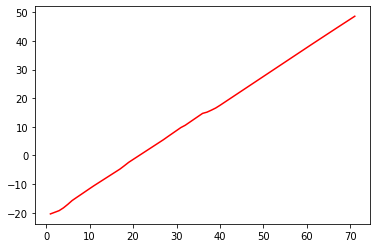

predict= [[-20.414183  ]
 [-19.846441  ]
 [-19.27367   ]
 [-18.297102  ]
 [-17.069963  ]
 [-15.732483  ]
 [-14.690054  ]
 [-13.664521  ]
 [-12.628992  ]
 [-11.593464  ]
 [-10.5730095 ]
 [ -9.6008625 ]
 [ -8.628713  ]
 [ -7.6565666 ]
 [ -6.684418  ]
 [ -5.7122703 ]
 [ -4.7401223 ]
 [ -3.5869017 ]
 [ -2.3939357 ]
 [ -1.401194  ]
 [ -0.4123994 ]
 [  0.57639635]
 [  1.5651909 ]
 [  2.553987  ]
 [  3.5427814 ]
 [  4.5315757 ]
 [  5.520371  ]
 [  6.595439  ]
 [  7.6485906 ]
 [  8.701742  ]
 [  9.752047  ]
 [ 10.553563  ]
 [ 11.594091  ]
 [ 12.63462   ]
 [ 13.67515   ]
 [ 14.710705  ]
 [ 15.128536  ]
 [ 15.823666  ]
 [ 16.572727  ]
 [ 17.525524  ]
 [ 18.535057  ]
 [ 19.544592  ]
 [ 20.554127  ]
 [ 21.563662  ]
 [ 22.573196  ]
 [ 23.582731  ]
 [ 24.592266  ]
 [ 25.6018    ]
 [ 26.611334  ]
 [ 27.620867  ]
 [ 28.630404  ]
 [ 29.639938  ]
 [ 30.649473  ]
 [ 31.659006  ]
 [ 32.66854   ]
 [ 33.678074  ]
 [ 34.68761   ]
 [ 35.69714   ]
 [ 36.70668   ]
 [ 37.716213  ]
 [ 38.725742  ]
 [ 39.725075  ]

array([[-20.414183  ],
       [-19.846441  ],
       [-19.27367   ],
       [-18.297102  ],
       [-17.069963  ],
       [-15.732483  ],
       [-14.690054  ],
       [-13.664521  ],
       [-12.628992  ],
       [-11.593464  ],
       [-10.5730095 ],
       [ -9.6008625 ],
       [ -8.628713  ],
       [ -7.6565666 ],
       [ -6.684418  ],
       [ -5.7122703 ],
       [ -4.7401223 ],
       [ -3.5869017 ],
       [ -2.3939357 ],
       [ -1.401194  ],
       [ -0.4123994 ],
       [  0.57639635],
       [  1.5651909 ],
       [  2.553987  ],
       [  3.5427814 ],
       [  4.5315757 ],
       [  5.520371  ],
       [  6.595439  ],
       [  7.6485906 ],
       [  8.701742  ],
       [  9.752047  ],
       [ 10.553563  ],
       [ 11.594091  ],
       [ 12.63462   ],
       [ 13.67515   ],
       [ 14.710705  ],
       [ 15.128536  ],
       [ 15.823666  ],
       [ 16.572727  ],
       [ 17.525524  ],
       [ 18.535057  ],
       [ 19.544592  ],
       [ 20.554127  ],
       [ 21

In [35]:
test_model("nihe.h5",mean,std)

测试数据
